In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

In [2]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
%%time

hist = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2217 - accuracy: 0.9359 - val_loss: 0.1118 - val_accuracy: 0.9645
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0858 - accuracy: 0.9746 - val_loss: 0.0815 - val_accuracy: 0.9757
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0528 - accuracy: 0.9840 - val_loss: 0.0674 - val_accuracy: 0.9776
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0609 - val_accuracy: 0.9815
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0594 - val_accuracy: 0.9816
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0627 - val_accuracy: 0.9813
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.0674 - val_accuracy: 0.9798
Epoch 

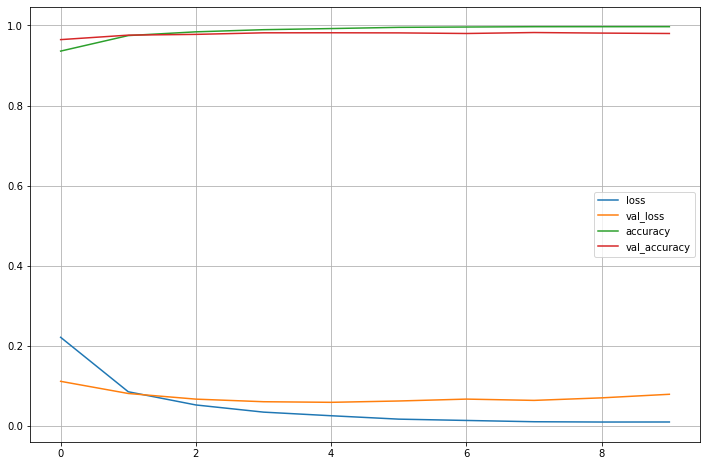

In [5]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()

In [6]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9798


In [7]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [8]:
np.argmax(predicted_result[0])

7

In [9]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [10]:
wrong_result = []

for n in range(len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

202

In [11]:
import random

samples = random.choices(population=wrong_result, k=16)

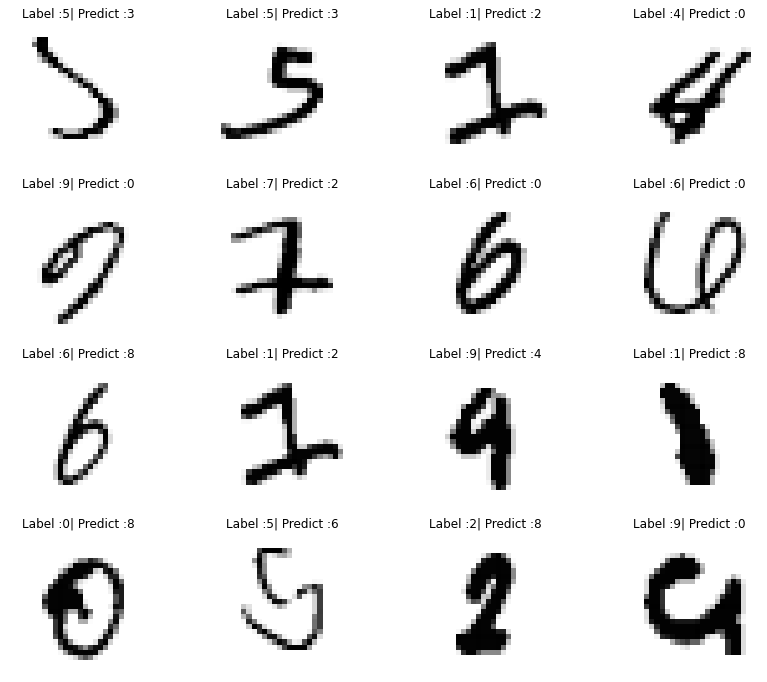

In [12]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')
    plt.title('Label :'+str(y_test[n]) + '| Predict :'+str(predicted_labels[n]))
    plt.axis('off')

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255

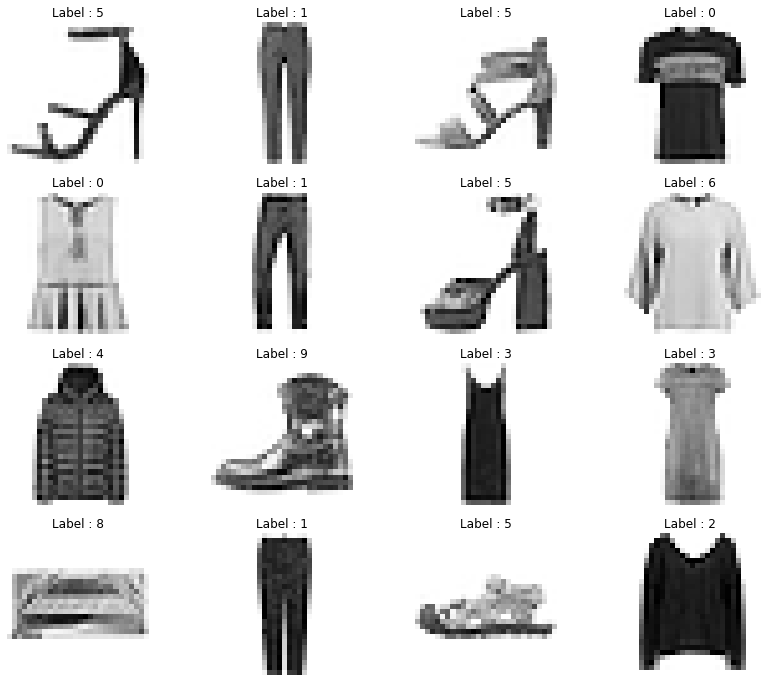

In [14]:
samples = random.choices(population=range(len(y_train)), k=16)
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys')
    plt.title(f'Label : {y_train[n]}')
    plt.axis('off')
plt.show()

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
%%time

hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4779 - accuracy: 0.8296 - val_loss: 0.4109 - val_accuracy: 0.8524
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3430 - accuracy: 0.8755 - val_loss: 0.3659 - val_accuracy: 0.8695
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3083 - accuracy: 0.8874 - val_loss: 0.3601 - val_accuracy: 0.8675
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2888 - accuracy: 0.8936 - val_loss: 0.3440 - val_accuracy: 0.8726
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2669 - accuracy: 0.9015 - val_loss: 0.3383 - val_accuracy: 0.8786
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2547 - accuracy: 0.9059 - val_loss: 0.3443 - val_accuracy: 0.8761
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2434 - accuracy: 0.9097 - val_loss: 0.3292 - val_accuracy: 0.8855
Epoch 

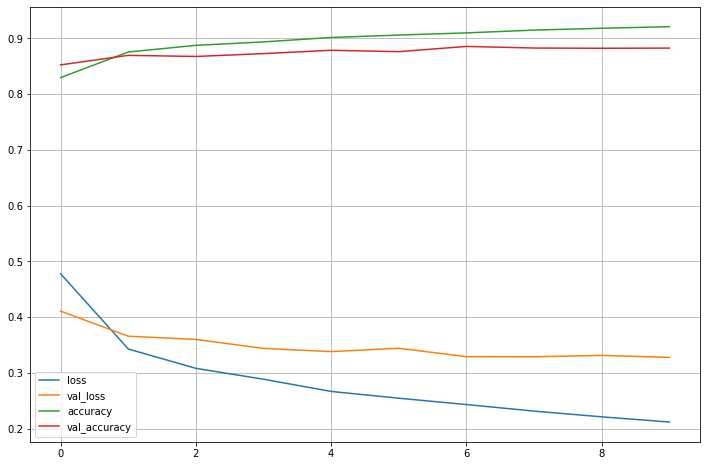

In [19]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()

In [21]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8825


[0.32785072922706604, 0.8824999928474426]